In [1]:
!pip install textatistic
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 5.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29068 sha256=6d68ddb4613deff4301913261569108ddd9fc28e26606d92709ad6b910d7a034
  Stored in directory: /root/.cache/pip/wheels/82/24/c4/de7882083c3530984f6eda43ae9e94875c84d906063ef10bcb
  Created wheel for pyhyphen: filename=PyHyphen-4.0.3-cp37-abi3-linux_x86_64.whl size=61050 sha256=1021e80e178a0e7c588040baab82a16cd5c5fc0ee5901c4b5bdd78daee9a5ef5
  Stored in directory: /root/.cache/pip/wheels/b4/10/17/b7d8ccc1f884ac699f7bdd1f4bd916d4ef111812a5d3177ff9
Successfully built textatistic pyhyphen
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, htt

In [1]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns, pandas as pd, re, nltk, itertools, spacy
nltk.download('punkt')
nltk.download("vader_lexicon")
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tree import Tree
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from collections import Counter, defaultdict
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
!python -m spacy download de_core_news_sm
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
from spacy.lang.en import English
from spacy.matcher import PhraseMatcher, Matcher
from spacy.tokens import Doc, Span
from spacy.language import Language
from spacy.pipeline import EntityRuler
from textatistic import Textatistic

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-19 16:32:14.374314: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.6 MB 12.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-19 16:32:25.621096: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████████████████████

## ***One-hot encoding***

Convert `df1` into a format that is suitable for machine learning.

- Use the **`columns`** attribute to print the features of `df1`.
- Use the **`pd.get_dummies()`** function to perform one-hot encoding on `feature 5` of `df1`.
- Use the **`columns`** attribute again to print the new features of `df1`.
- Print the first five rows of df1 using **`head()`**.


```
   feature 1  feature 2  feature 3  feature 4 feature 5  label
0     29.000          0          0    211.338    female      1
1      0.917          1          2    151.550      male      1
2      2.000          1          2    151.550    female      0
3     30.000          1          2    151.550      male      0
4     25.000          1          2    151.550    female      0
```



In [ ]:
# Print the features of df1
print(df1.columns)

# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['feature 5'])

# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
print(df1.head())

df1 = pd.get_dummies(df1, columns=['feature 5'], drop_first=True)
print(df1.head())



```
    Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'label'], dtype='object')

    Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'label', 'feature 5_female', 'feature 5_male'], dtype='object')

       feature 1  feature 2  feature 3  feature 4  label  feature 5_female  feature 5_male
    0     29.000          0          0    211.338      1                 1               0
    1      0.917          1          2    151.550      1                 0               1
    2      2.000          1          2    151.550      0                 1               0
    3     30.000          1          2    151.550      0                 0               1
    4     25.000          1          2    151.550      0                 1               0


        feature 1  feature 2  feature 3  feature 4  label  feature 5_male
    0     29.000          0          0    211.338      1               0
    1      0.917          1          2    151.550      1               1
    2      2.000          1          2    151.550      0               0
    3     30.000          1          2    151.550      0               1
    4     25.000          1          2    151.550      0               0
```
## ***Character count of Russian tweets***

In this exercise, you have been given a dataframe tweets which contains some tweets associated with Russia's Internet Research Agency and compiled by FiveThirtyEight.

Create a new feature `'char_count'` in `tweets` which computes the number of characters for each tweet. Also, compute the average length of each tweet. The tweets are available in the `content` feature of `tweets`.


- Create a new feature `char_count` by applying **`len`** to the `'content'` feature of `tweets`.

- Print the average character count of the tweets by computing the mean of the `'char_count'` feature.


In [2]:
tweets = pd.read_csv('russian_tweets.csv')

# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


Notice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters. Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.

## ***Word count of TED talks***

`ted` is a dataframe that contains the transcripts of 500 TED talks. Your job is to compute a new feature `word_count` which contains the approximate number of words for each talk. Consequently, you also need to compute the average word count of the talks. The transcripts are available as the `transcript` feature in `ted`.

In order to complete this task, you will need to define a function `count_words` that takes in a string as an argument and returns the number of words in the string. You will then need to apply this function to the `transcript` feature of ted to create the new feature `word_count` and compute its mean.

- Split string into a list of words using the **`split()`** method.
- Return the number of elements in words using `len()`.
- Apply your function to the `transcript` column of `ted` to create the new feature `word_count`.
- Compute the average word count of the talks using **`mean()`**.

In [4]:
ted = pd.read_csv('ted.csv')

# Function that returns number of words in a string
def count_words(string):
	  # Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


You can use the `word_count` feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED.

## ***Hashtags and mentions in Russian tweets***

Let's revisit the `tweets` dataframe containing the Russian tweets. In this exercise, you will compute the number of hashtags and mentions in each tweet by defining two functions `count_hashtags()` and `count_mentions()` respectively and applying them to the `content` feature of tweets.

In case you don't recall, the `tweets` are contained in the `content` feature of `tweets`.


- In the list comprehension, use **`startswith()`** to check if a particular word starts with `'#'`.

- In the list comprehension, use **`startswith()`** to check if a particular word starts with `'@'`.

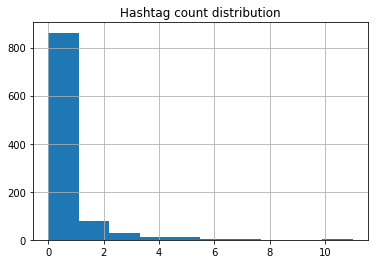

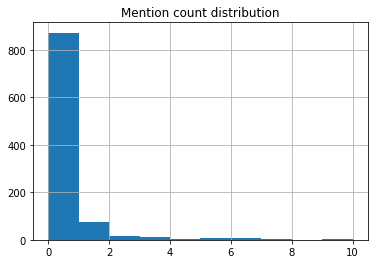

In [5]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

## ***Readability of 'The Myth of Sisyphus'***

Compute the Flesch reading ease score for Albert Camus' famous essay The Myth of Sisyphus. We will then interpret the value of this score as explained in the video and try to determine the reading level of the essay.

The entire essay is in the form of a string and is available as `sisyphus_essay`.

- Import the **`Textatistic`** class from `textatistic`.
- Compute the **`readability_scores`** dictionary for `sisyphus_essay` using **`Textatistic`**.
- Print the Flesch reading ease score from the `readability_scores` dictionary.

In [2]:
sisyphus_essay = '\nThe gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the stone would fall back of its own weight. They had thought with some reason that there is no more dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most prudent of mortals. According to another tradition, however, he was disposed to practice the profession of highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. He was punished for this in the underworld. Homer tells us also that Sisyphus had put Death in chains. Pluto could not endure the sight of his deserted, silent empire. He dispatched the god of war, who liberated Death from the hands of her conqueror. It is said that Sisyphus, being near to death, rashly wanted to test his wife\'s love. He ordered her to cast his unburied body into the middle of the public square. Sisyphus woke up in the underworld. And there, annoyed by an obedience so contrary to human love, he obtained from Pluto permission to return to earth in order to chastise his wife. But when he had seen again the face of this world, enjoyed water and sun, warm stones and the sea, he no longer wanted to go back to the infernal darkness. Recalls, signs of anger, warnings were of no avail. Many years more he lived facing the curve of the gulf, the sparkling sea, and the smiles of earth. A decree of the gods was necessary. Mercury came and seized the impudent man by the collar and, snatching him from his joys, lead him forcibly back to the underworld, where his rock was ready for him. You have already grasped that Sisyphus is the absurd hero. He is, as much through his passions as through his torture. His scorn of the gods, his hatred of death, and his passion for life won him that unspeakable penalty in which the whole being is exerted toward accomplishing nothing. This is the price that must be paid for the passions of this earth. Nothing is told us about Sisyphus in the underworld. Myths are made for the imagination to breathe life into them. As for this myth, one sees merely the whole effort of a body straining to raise the huge stone, to roll it, and push it up a slope a hundred times over; one sees the face screwed up, the cheek tight against the stone, the shoulder bracing the clay-covered mass, the foot wedging it, the fresh start with arms outstretched, the wholly human security of two earth-clotted hands. At the very end of his long effort measured by skyless space and time without depth, the purpose is achieved. Then Sisyphus watches the stone rush down in a few moments toward tlower world whence he will have to push it up again toward the summit. He goes back down to the plain. It is during that return, that pause, that Sisyphus interests me. A face that toils so close to stones is already stone itself! I see that man going back down with a heavy yet measured step toward the torment of which he will never know the end. That hour like a breathing-space which returns as surely as his suffering, that is the hour of consciousness. At each of those moments when he leaves the heights and gradually sinks toward the lairs of the gods, he is superior to his fate. He is stronger than his rock. If this myth is tragic, that is because its hero is conscious. Where would his torture be, indeed, if at every step the hope of succeeding upheld him? The workman of today works everyday in his life at the same tasks, and his fate is no less absurd. But it is tragic only at the rare moments when it becomes conscious. Sisyphus, proletarian of the gods, powerless and rebellious, knows the whole extent of his wretched condition: it is what he thinks of during his descent. The lucidity that was to constitute his torture at the same time crowns his victory. There is no fate that can not be surmounted by scorn. If the descent is thus sometimes performed in sorrow, it can also take place in joy. This word is not too much. Again I fancy Sisyphus returning toward his rock, and the sorrow was in the beginning. When the images of earth cling too tightly to memory, when the call of happiness becomes too insistent, it happens that melancholy arises in man\'s heart: this is the rock\'s victory, this is the rock itself. The boundless grief is too heavy to bear. These are our nights of Gethsemane. But crushing truths perish from being acknowledged. Thus, Edipus at the outset obeys fate without knowing it. But from the moment he knows, his tragedy begins. Yet at the same moment, blind and desperate, he realizes that the only bond linking him to the world is the cool hand of a girl. Then a tremendous remark rings out: "Despite so many ordeals, my advanced age and the nobility of my soul make me conclude that all is well." Sophocles\' Edipus, like Dostoevsky\'s Kirilov, thus gives the recipe for the absurd victory. Ancient wisdom confirms modern heroism. One does not discover the absurd without being tempted to write a manual of happiness. "What!---by such narrow ways--?" There is but one world, however. Happiness and the absurd are two sons of the same earth. They are inseparable. It would be a mistake to say that happiness necessarily springs from the absurd. Discovery. It happens as well that the felling of the absurd springs from happiness. "I conclude that all is well," says Edipus, and that remark is sacred. It echoes in the wild and limited universe of man. It teaches that all is not, has not been, exhausted. It drives out of this world a god who had come into it with dissatisfaction and a preference for futile suffering. It makes of fate a human matter, which must be settled among men. All Sisyphus\' silent joy is contained therein. His fate belongs to him. His rock is a thing. Likewise, the absurd man, when he contemplates his torment, silences all the idols. In the universe suddenly restored to its silence, the myriad wondering little voices of the earth rise up. Unconscious, secret calls, invitations from all the faces, they are the necessary reverse and price of victory. There is no sun without shadow, and it is essential to know the night. The absurd man says yes and his efforts will henceforth be unceasing. If there is a personal fate, there is no higher destiny, or at least there is, but one which he concludes is inevitable and despicable. For the rest, he knows himself to be the master of his days. At that subtle moment when man glances backward over his life, Sisyphus returning toward his rock, in that slight pivoting he contemplates that series of unrelated actions which become his fate, created by him, combined under his memory\'s eye and soon sealed by his death. Thus, convinced of the wholly human origin of all that is human, a blind man eager to see who knows that the night has no end, he is still on the go. The rock is still rolling. I leave Sisyphus at the foot of the mountain! One always finds one\'s burden again. But Sisyphus teaches the higher fidelity that negates the gods and raises rocks. He too concludes that all is well. This universe henceforth without a master seems to him neither sterile nor futile. Each atom of that stone, each mineral flake of that night filled mountain, in itself forms a world. The struggle itself toward the heights is enough to fill a man\'s heart. One must imagine Sisyphus happy.\n'

# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

The Flesch Reading Ease is 81.67


Notice that the score for this essay is approximately 81.67. This indicates that the essay is at the readability level of a 6th grade American student.

## ***Readability of various publications***

In this exercise, you have been given excerpts of articles from four publications. Your task is to compute the readability of these excerpts using the Gunning fog index and consequently, determine the relative difficulty of reading these publications.

The excerpts are available as the following strings:

- `forbes`- An excerpt from an article from Forbes magazine on the Chinese social credit score system.
- `harvard_law`- An excerpt from a book review published in Harvard Law Review.

-`r_digest`- An excerpt from a Reader's Digest article on flight turbulence.

- `time_kids` - An excerpt from an article on the ill effects of salt consumption published in TIME for Kids.

- Import the **`Textatistic`** class from `textatistic`.
- Compute the `readability_scores` dictionary for each excerpt using **`Textatistic`**.
- Select the Gunning fog index from the `readability_scores` dictionary for each excerpt and append it to `gunning_fog_scores`.
- Print the list of Gunning fog indices.

In [ ]:
# Import Textatistic
from textatistic import Textatistic

# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
    readability_scores = Textatistic(excerpt).scores
    gunning_fog = readability_scores['gunningfog_score']
    gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)



```
[14.436002482929858, 20.735401069518716, 11.085587583148559, 5.926785009861934]
```



You are now adept at computing readability scores for various pieces of text. Notice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students.

## ***Tokenizing the Gettysburg Address***

In this exercise, you will be tokenizing one of the most famous speeches of all time: the Gettysburg Address delivered by American President Abraham Lincoln during the American Civil War.

The entire speech is available as a string named **`gettysburg`**.

- Load the `en_core_web_sm` model using **`spacy.load()`**.
- Create a `doc` object `doc` for the `gettysburg` string.
- Using list comprehension, loop over `doc` to generate the token texts.

In [5]:
gettysburg = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth."

import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate the tokens
tokens = [token.text for token in doc]
print(tokens)

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "n't", 'dedicate', '-', 'we', '

## ***Lemmatizing the Gettysburg address***

Lemmatize the `gettysburg` address.

However, this time, we will also take a look at the speech, before and after lemmatization, and try to adjust the kind of changes that take place to make the piece more machine friendly.


- Print the `gettysburg` address to the console.
- Loop over doc and extract the lemma for each token of `gettysburg`.
- Convert `lemmas` into a string using `join`.

In [4]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate lemmas
lemmas = [token.lemma_ for token in doc]

# Convert lemmas into a string
print(' '.join(lemmas))

four score and seven year ago our father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now we be engage in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long endure . we be meet on a great battlefield of that war . we 've come to dedicate a portion of that field , as a final resting place for those who here give their life that that nation might live . it be altogether fitting and proper that we should do this . but , in a large sense , we can not dedicate - we can not consecrate - we can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate it , far above our poor power to add or detract . the world will little note , nor long remember what we say here , but it can never forget what they do here . it be for we the living , rather , to be dedicate here to the unfinished work which they who fight here have thus

## ***Cleaning a blog post***

In this exercise, you have been given an excerpt from a blog post. Your task is to clean this text into a more machine friendly format. This will involve converting to lowercase, lemmatization and removing stopwords, punctuations and non-alphabetic characters.

The excerpt is available as a string `blog` and has been printed to the console. The list of stopwords are available as `stopwords`.


- Using list comprehension, loop through `doc` to extract the `lemma_` of each token.
- Remove stopwords and non-alphabetic tokens using `stopwords` and **`isalpha()`**.

In [8]:
blog = '\nTwenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.\n'
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(blog)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]

# Print string after text cleaning
print(' '.join(a_lemmas))

century politic witness alarming rise populism Europe warning sign come UK Brexit Referendum vote swinge way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Five Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


 Take a look at the cleaned text; it is lowercased and devoid of numbers, punctuations and commonly used stopwords. Also, note that the word U.S. was present in the original text. Since it had periods in between, our text cleaning process completely removed it. This may not be ideal behavior. It is always advisable to use your custom functions in place of **`isalpha()`** for more nuanced cases.

 ## ***Cleaning TED talks in a dataframe***

In this exercise, we will revisit the TED Talks from the first chapter. You have been a given a dataframe `ted` consisting of 5 TED Talks. Your task is to clean these talks using techniques discussed earlier by writing a function preprocess and applying it to the transcript feature of the dataframe.

The stopwords list is available as `stopwords`.


- Generate the `Doc` object for text. Ignore the `disable` argument for now.
- Generate lemmas using list comprehension using the **`lemma_`** attribute.
- Remove non-alphabetic characters using **`isalpha()`** in the `if` condition.

In [11]:
ted = pd.read_csv('ted.csv').head(20)
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'])

0     talk new lecture TED I illusion create TED I t...
1     representation brain brain break left half log...
2     great honor today share Digital Universe creat...
3     passion music technology thing combination thi...
4     use want computer new program programming requ...
5     I neuroscientist mixed background physics medi...
6     Pat Mitchell day January begin like work love ...
7     Taylor Wilson I year old I nuclear physicist l...
8     I grow Northern Ireland right north end absolu...
9     I publish article New York Times Modern Love c...
10    Joseph Member Parliament Kenya picture Maasai ...
11    hi I talk little bit music machine life specif...
12    hi let I ask audience question lie child raise...
13    historical record allow know ancient Greeks dr...
14    good morning I little boy I experience change ...
15    I slide I year ago time I short slide morning ...
16    I like world I like share year old love story ...
17    I fail woman I fail feminist I passionate 

You have preprocessed all the TED talk transcripts contained in ted and it is now in a good shape to perform operations such as vectorization.

## ***POS tagging in Lord of the Flies***

Perform part-of-speech tagging on a famous passage from one of the most well-known novels of all time, Lord of the Flies, authored by William Golding.

The passage is available as `lotf` and has already been printed to the console.

- Load the `en_core_web_sm` model.
- Create a `doc` object for lotf using **`nlp()`**.
- Using the **`text`** and **`pos_`** attributes, generate tokens and their corresponding POS tags.

In [12]:
lotf = 'He found himself understanding the wearisomeness of this life, where every path was an improvisation and a considerable part of one’s waking life was spent watching one’s feet.'

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(lotf)

# Generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('He', 'PRON'), ('found', 'VERB'), ('himself', 'PRON'), ('understanding', 'VERB'), ('the', 'DET'), ('wearisomeness', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('life', 'NOUN'), (',', 'PUNCT'), ('where', 'SCONJ'), ('every', 'DET'), ('path', 'NOUN'), ('was', 'AUX'), ('an', 'DET'), ('improvisation', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('considerable', 'ADJ'), ('part', 'NOUN'), ('of', 'ADP'), ('one', 'NUM'), ('’s', 'NUM'), ('waking', 'VERB'), ('life', 'NOUN'), ('was', 'AUX'), ('spent', 'VERB'), ('watching', 'VERB'), ('one', 'NUM'), ('’s', 'NUM'), ('feet', 'NOUN'), ('.', 'PUNCT')]


Examine the various POS tags attached to each token and evaluate if they make intuitive sense to you. You will notice that they are indeed labelled correctly according to the standard rules of English grammar.

## ***Counting nouns in a piece of text***

In this exercise, we will write two functions, `nouns()` and `proper_nouns()` that will count the number of other nouns and proper nouns in a piece of text respectively.

These functions will take in a piece of text and generate a list containing the POS tags for each word. It will then return the number of proper nouns/other nouns that the text contains. We will use these functions in the next exercise to generate interesting insights about fake news.

The `en_core_web_sm` model has already been loaded as `nlp` in this exercise.

- Using the list **`count`** method, count the number of proper nouns (annotated as `PROPN`) in the `pos` list.


- Using the list **`count`** method, count the number of other nouns (annotated as `NOUN`) in the `pos` list.

In [13]:
nlp = spacy.load('en_core_web_sm')

# Returns number of proper nouns
def proper_nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples."))

3


In [14]:
nlp = spacy.load('en_core_web_sm')

# Returns number of other nouns
def nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

2


## ***Noun usage in fake news***

In this exercise, you have been given a dataframe `headlines` that contains news headlines that are either fake or real. Your task is to generate two new features `num_propn` and `num_noun` that represent the number of proper nouns and other nouns contained in the `title` feature of `headlines`.

Next, we will compute the mean number of proper nouns and other nouns used in fake and real news headlines and compare the values. If there is a remarkable difference, then there is a good chance that using the `num_propn` and `num_noun` features in fake news detectors will improve its performance.

To accomplish this task, the functions `proper_nouns` and `nouns` that you had built above have already been made available to you.

- Create a new feature `num_propn` by applying `proper_nouns` to headlines `['title']`.

- Filter headlines to compute the mean number of proper nouns in fake news using the **`mean`** method.

- Repeat the process for other nouns: create a feature `'num_noun'` using `nouns` and compute the mean of other nouns

In [17]:
headlines = pd.read_csv('fakenews.csv').drop(columns='Unnamed: 0')

headlines['num_propn'] = headlines['title'].apply(proper_nouns)

# Compute mean of proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()

# Print results
print("Mean no. of proper nouns in real and fake headlines are %.2f and %.2f respectively"%(real_propn, fake_propn))

Mean no. of proper nouns in real and fake headlines are 2.37 and 4.81 respectively


In [18]:
headlines['num_noun'] = headlines['title'].apply(nouns)

# Compute mean of other nouns
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

# Print results
print("Mean no. of other nouns in real and fake headlines are %.2f and %.2f respectively"%(real_noun, fake_noun))

Mean no. of other nouns in real and fake headlines are 2.39 and 1.60 respectively


Notice how the mean number of proper nouns is considerably higher for fake news than it is for real news. The opposite seems to be true in the case of other nouns. This fact can be put to great use in designing fake news detectors.

## ***Named entities in a sentence***

In this exercise, we will identify and classify the labels of various named entities in a body of text using one of spaCy's statistical models. We will also verify the veracity of these labels.

- Use **`spacy.load()`** to load the ` en_core_web_sm` model.
- Create a Doc instance `doc` using `text` and `nlp`.
- Loop over `doc.ents` to print all the named entities and their corresponding labels.

In [19]:
# Load the required model
nlp = spacy.load('en_core_web_sm')

# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

Sundar Pichai PERSON
Google ORG
Mountain View GPE


 Notice how the model correctly predicted the labels of Google and Mountain View but mislabeled Sundar Pichai as an organization (แต่ในเวอร์ชั่น 3 ด้านบน ทำได้ตรงถูกต้องแล้ว). As discussed in the video, the predictions of the model depend strongly on the data it is trained on. It is possible to train spaCy models on your custom data.

## ***Identifying people mentioned in a news article***

In this exercise, you have been given an excerpt from a news article published in TechCrunch. Your task is to write a function `find_people` that identifies the names of people that have been mentioned in a particular piece of text. You will then use `find_people` to identify the people of interest in the article.

The article is available as the string `tc` and has been printed to theconsole. The required `spacy` model has also been already loaded as `nlp`.

- Create a Doc object for `text`.
- Using list comprehension, loop through `doc.ents` and create a list of named entities whose label is `PERSON`.
- Using `find_persons()`, print the people mentioned in `tc`.

In [20]:
tc = "\nIt’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it.\n"

def find_persons(text):
  # Create Doc object
  doc = nlp(text)
  
  # Identify the persons
  persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  
  # Return persons
  return persons

print(find_persons(tc))

['Facebook', 'Sheryl Sandberg', 'Mark Zuckerberg', 'Facebook']


In [21]:
doc = nlp(tc)
for ent in doc.ents:
    print(ent.text, ent.label_)

Facebook PERSON
Earlier this morning TIME
Sheryl Sandberg PERSON
Christchurch ORG
Mark Zuckerberg PERSON
Facebook PERSON


The article was related to Facebook and our function correctly identified both the people mentioned, but incorrectly identified Facebook. You can now see how NER could be used in a variety of applications. Publishers may use a technique like this to classify news articles by the people mentioned in them. A question answering system could also use something like this to answer questions such as 'Who are the people mentioned in this passage?'. 

# **Bag of words**
- Extract word tokens
- Compute frequency of word tokens
- Construct a word vector out of these frequencies and vocabulary of corpus

### **Corpus**

```
"The lion is the king of the jungle"
```
```
"Lions have lifespans of a decade"
```
```
"The lion is an endangered species"
```

### **Vocabulary →** `a` , `an` , `decade` , `endangered` , `have` , `is` , `jungle` , `king` , `lifespans` , `lion` ,`Lions` , `of` , `species` , `the` , `The`

- Word vectors have 15 dimensions.
- Each value in the vector corresponds to the frequency of the corresponding word in the vocabulary.

```
"The lion is the king of the jungle"
[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1]
```
```
"Lions have lifespans of a decade"
[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
```
```
"The lion is an endangered species"
[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
```

# **Bag of words model using sklearn**

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = pd.Series(['The lion is the king of the jungle',
                    'Lions have lifespans of a decade',
                    'The lion is an endangered species'])

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)
print(bow_matrix.toarray())

[[0 0 0 0 1 1 1 0 1 0 1 0 3]
 [0 1 0 1 0 0 0 1 0 1 1 0 0]
 [1 0 1 0 1 0 0 0 1 0 0 1 1]]


ตัวเลขไม่เหมือนกัน เพราะ CountVectorizer ทำเป็น lowercase ก่อน

## ***BoW model for movie taglines***

In this exercise, you have been provided with a corpus of more than 7000 movie tag lines. Your job is to generate the bag of words representation `bow_matrix` for these taglines. For this exercise, we will ignore the text preprocessing step and generate `bow_matrix` directly.

We will also investigate the shape of the resultant `bow_matrix`. 

- Import the **`CountVectorizer`** class from **`sklearn`**.
- Instantiate a **`CountVectorizer`** object. Name it `vectorizer`.
- Using `fit_transform()`, generate `bow_matrix` for corpus.

In [13]:
corpus = pd.read_csv('movie_overviews.csv').dropna()['tagline']
print(corpus.shape, "\n")

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Print the shape of bow_matrix
print(bow_matrix.shape)


(7033,) 

(7033, 6614)


 You now know how to generate a bag of words representation for a given corpus of documents. Notice that the word vectors created have more than 6600 dimensions. However, most of these dimensions have a value of zero since most words do not occur in a particular tagline.

 ## ***Analyzing dimensionality and preprocessing***

In this exercise, you have been provided with a `lem_corpus` which contains the pre-processed versions of the movie taglines from the previous exercise. In other words, the taglines have been lowercased and lemmatized, and stopwords have been removed.

Your job is to generate the bag of words representation `bow_lem_matrix` for these lemmatized taglines and compare its shape with that of `bow_matrix` obtained in the previous exercise. 


- Import the **`CountVectorizer`** class from `sklearn`.
- Instantiate a **`CountVectorizer`** object. Name it `vectorizer`.
- Using **`fit_transform()`**, generate `bow_lem_matrix` for `lem_corpus`.

In [22]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma.lower() for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

lem_corpus = corpus.apply(preprocess)
print(lem_corpus.head())

1    roll dice unleash excitement
2           yell fight ready love
3    friend people let let forget
4      world normal surprise life
5          los angeles crime saga
Name: tagline, dtype: object


In [23]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_lem_matrix = vectorizer.fit_transform(lem_corpus)

# Print the shape of bow_lem_matrix
print(bow_lem_matrix.shape)

(7033, 5283)


Notice how the number of features have reduced significantly from around 6,614 to around 5,283 for pre-processed movie taglines. The reduced number of dimensions on account of text preprocessing usually leads to better performance when conducting machine learning and it is a good idea to consider it. However, as mentioned in a previous lesson, the final decision always depends on the nature of the application.

## ***Mapping feature indices with feature names***

**`CountVectorizer`** doesn't necessarily index the vocabulary in alphabetical order. In this exercise, we will learn to map each feature index to its corresponding feature name from the vocabulary.

We will use the same three sentences on lions from the above. The sentences are available in a list named `corpus`.


- Instantiate a **`CountVectorizer`** object. Name it `vectorizer`.
- Using **`fit_transform()`**, generate `bow_matrix` for `corpus`.
- Using the **`get_feature_names_out()`** method, map the column names to the corresponding word in the vocabulary.

In [26]:
corpus = ['The lion is the king of the jungle', 'Lions have lifespans of a decade', 'The lion is an endangered species']

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names_out()

# Print bow_df
bow_df

,an,decade,endangered,have,is,jungle,king,lifespans,lion,lions,of,species,the
0,0,0,0,0,1,1,1,0,1,0,1,0,3
1,0,1,0,1,0,0,0,1,0,1,1,0,0
2,1,0,1,0,1,0,0,0,1,0,0,1,1


Observe that the column names refer to the token whose frequency is being recorded. Therefore, since the first column name is an, ***the first feature 
represents the number of times the word 'an' occurs*** in a particular sentence. **`get_feature_names_out()`** essentially gives us a list which represents the mapping of the feature indices to the feature name in the vocabulary.

# **CountVectorizer arguments**

- `lowercase` : `False` , `True`
- `strip_accents` : `'unciode'` , `'ascii'` , `None`
- `stop_words` : `'english'` , `list` , `None`
- `token_pattern` : `regex`
- `tokenizer` : `function`

## ***BoW vectors for movie reviews***

In this exercise, you have been given two pandas Series, `X_train` and `X_test`, which consist of movie reviews. They represent the training and the test review data respectively. Your task is to preprocess the reviews and generate BoW vectors for these two sets using **`CountVectorizer`**.

Once we have generated the BoW vector matrices `X_train_bow` and `X_test_bow`, we will be in a very good position to apply a machine learning model to it and conduct sentiment analysis.

- Import **`CountVectorizer`** from the `sklearn` library.
- Instantiate a **`CountVectorizer`** object named `vectorizer`. Ensure that all words are converted to lowercase and english stopwords are removed.
- Using `X_train`, fit vectorizer and then use it to transform `X_train` to generate the set of BoW vectors `X_train_bow`.
- Transform `X_test` using vectorizer to generate the set of BoW vectors `X_test_bow`.

In [46]:
df = pd.read_csv('movie_reviews_clean.csv')
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.25)

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

(750, 15008)
(250, 15008)


Both `X_train_bow` and `X_test_bow` have 15,009 features. There were words present in `X_test` that were not in `X_train`. CountVectorizer chose to ignore them in order to ensure that the dimensions of both sets remain the same.

## ***Predicting the sentiment of a movie review***

In the previous exercise, you generated the bag-of-words representations for the training and test movie review data. In this exercise, we will use this model to train a Naive Bayes classifier that can detect the sentiment of a movie review and compute its accuracy. Note that since this is a binary classification problem, the model is only capable of classifying a review as either positive (1) or negative (0). It is incapable of detecting neutral reviews.

In case you don't recall, the training and test BoW vectors are available as `X_train_bow` and `X_test_bow` respectively. The corresponding labels are available as `y_train` and `y_test` respectively. Also, for your reference, the original movie review dataset is available as `df`.

- Instantiate an object of **`MultinomialNB`**. Name it `clf`.
- Fit `clf` using `X_train_bow` and `y_train`.
- Measure the accuracy of `clf` using `X_test_bow` and `y_test`.

In [47]:
# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.828
The sentiment predicted by the classifier is 0


Note that the accuracy of the classifier is 84.4%. Considering the fact that it was trained on only 750 reviews, this is reasonably good performance. The classifier also correctly predicts the sentiment of a mini negative review which we passed into it.

# **BoW shortcomings**

```
review                                 label
'The movie was good and not boring' positive
'The movie was not good and boring' negative
```
- Exactly the same BoW representation!
- Context of the words is lost.
- Sentiment dependent on the position of 'not'.

# **n-grams**



```
'for you a thousand times over'
```
- n = 2, n-grams:
```
[
'for you',
'you a',
'a thousand',
'thousand times',
'times over'
]
```

# **Building n-gram models using scikit-learn**

Generates only bigrams.








In [ ]:
bigrams = CountVectorizer(ngram_range=(2,2))

Generates unigrams, bigrams and trigrams.

In [ ]:
ngrams = CountVectorizer(ngram_range=(1,3))

## ***n-gram models for movie tag lines***

A `corpus` has more than 9000 movie tag lines. Our job is to generate n-gram models up to n equal to 1, n equal to 2 and n equal to 3 for this data and discover the number of features for each model.

We will then compare the number of features generated for each model.

- Generate an n-gram model with n-grams up to n=1. Name it `ng1`
- Generate an n-gram model with n-grams up to n=2. Name it `ng2`
- Generate an n-Gram Model with n-grams up to n=3. Name it `ng3`
- Print the number of features for each model.

In [35]:
corpus = pd.read_csv('movie_overviews.csv').dropna()['tagline']

# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(corpus)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

ng1, ng2 and ng3 have 6614, 37100 and 76881 features respectively


You now know how to generate n-gram models containing higher order n-grams. Notice that ng2 has over 37,000 features whereas ng3 has over 76,000 features. This is much greater than the 6,000 dimensions obtained for ng1. As the n-gram range increases, so does the number of features, leading to increased computational costs and a problem known as the curse of dimensionality.

## ***Higher order n-grams for sentiment analysis***

Similar to a previous exercise, we are going to build a classifier that can detect if the review of a particular movie is positive or negative. However, this time, we will use n-grams up to n=2 for the task.

The n-gram training reviews are available as `X_train_ng`. The corresponding test reviews are available as `X_test_ng`. Finally, use `y_train` and `y_test` to access the training and test sentiment classes respectively.

- Define an instance of **`MultinomialNB`**. Name it `clf_ng`
- Fit the classifier on `X_train_ng` and `y_train`.
- Measure accuracy on `X_test_ng` and `y_test` the using **`score()`** method.

In [51]:
df = pd.read_csv('movie_reviews_clean.csv')
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.25)
ng_vectorizer = CountVectorizer(lowercase=True, stop_words='english')#, ngram_range=(1, 2))
X_train_ng = ng_vectorizer.fit_transform(X_train)
X_test_ng = ng_vectorizer.transform(X_test)

# Define an instance of MultinomialNB 
clf_ng = MultinomialNB()

# Fit the classifier 
clf_ng.fit(X_train_ng, y_train)

# Measure the accuracy 
accuracy = clf_ng.score(X_test_ng, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf_ng.predict(ng_vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.832
The sentiment predicted by the classifier is 0


## ***Comparing performance of n-gram models***

You now know how to conduct sentiment analysis by converting text into various n-gram representations and feeding them to a classifier. In this exercise, we will conduct sentiment analysis for the same movie reviews from before using two n-gram models: unigrams and n-grams upto n equal to 3.

We will then compare the performance using three criteria: accuracy of the model on the test set, time taken to execute the program and the number of features created when generating the n-gram representation.

- Initialize a **`CountVectorizer`** object such that it generates unigrams.
- Initialize a **`CountVectorizer`** object such that it generates ngrams upto n=3.

In [53]:
import time

start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 1.325 seconds to complete. The accuracy on the test set is 0.75. The ngram representation had 12347 features.


In [54]:
start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer(ngram_range=(1, 3))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 2.500 seconds to complete. The accuracy on the test set is 0.77. The ngram representation had 178240 features.


Despite taking higher computation time and generating more features, the classifier only performs marginally better in the latter case, producing an accuracy of 77% in comparison to the 75% for the unigram model.

## **tf-idf document vectors**

### **Motivation**

- Some words occur very commonly across all documents
- Corpus of documents on the universe
   - One document has `jupiter` and `universe` occurring 20 times each.
   - `jupiter` rarely occurs in the other documents. `universe` is common.
   -  Give more weight to `jupiter` on account of exclusivity.

$$w_{ij} = tf_{ij} \times \log\left(\frac{N}{df_i} \right)$$

- $w_{ij}$ ⟶ weight of word $i$ in document $j$
- $tf_{ij}$ ⟶ frequency of word $i$ in document $j$
- $N$ ⟶ number of documents in the corpus
- $df_i$  ⟶ number of documents containing word $i$

## ***tf-idf vectors for TED talks***

In this exercise, you have been given a corpus `ted` which contains the transcripts of 500 TED Talks. Your task is to generate the tf-idf vectors for these talks.

In a later lesson, we will use these vectors to generate recommendations of similar talks based on the transcript.

- Import **`TfidfVectorizer`** from **`sklearn`**.
- Create a **`TfidfVectorizer`** object. Name it `vectorizer`.
- Generate `tfidf_matrix` for `ted` using the **`fit_transform()`** method.

In [4]:
ted = pd.read_csv('ted.csv')['transcript']

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(500, 29158)


You now know how to generate tf-idf vectors for a given corpus of text. You can use these vectors to perform predictive modeling just like we did with **`CountVectorizer`**. In the next few lessons, we will see another extremely useful application of the vectorized form of documents: generating recommendations.

# **Cosine Similarity**

- เอามาใช้ดูว่า word vectors มันคล้ายกันไหม

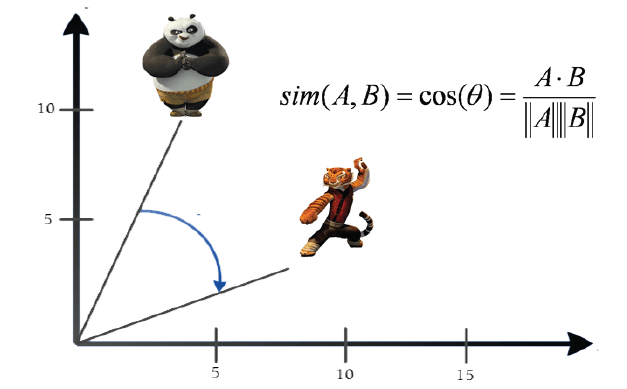

- มีค่าระหว่าง 0 ถึง 1
- ถ้าได้ 1 แปลว่า เหมือนกันเป๊ะ ได้ 0 แปลว่าไม่เหมือนกันเลย

## ***Cosine similarity matrix of a corpus***

You have been given a `corpus`, which is a list containing five sentences. Compute the cosine similarity matrix which contains the pairwise cosine similarity score for every pair of sentences (vectorized using tf-idf).

Remember, the value corresponding to the ith row and jth column of a similarity matrix denotes the similarity score for the ith and jth vector.

- Initialize an instance of **`TfidfVectorizer`**. Name it `tfidf_vectorizer`.
- Using **`.fit_transform()`**, generate the tf-idf vectors for `corpus`. Name it `tfidf_matrix`.
- Use `cosine_similarity()` and pass `tfidf_matrix` to compute the cosine similarity matrix `cosine_sim`.

In [8]:
corpus =  ['The sun is the largest celestial body in the solar system', 'The solar system consists of the sun and eight revolving planets', 'Ra was the Egyptian Sun God', 'The Pyramids were the pinnacle of Egyptian architecture', 'The quick brown fox jumps over the lazy dog']


# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


Computing the cosine similarity matrix lies at the heart of many practical systems such as ***recommenders***. From our similarity matrix, we see that the first and the second sentence are the most similar. Also the fifth sentence has, on average, the lowest pairwise cosine scores. This is intuitive as it contains entities that are not present in the other sentences.



In [4]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.33721756, 0.        , 0.33721756,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33721756, 0.33721756, 0.        , 0.33721756,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.272065  ,
        0.22583853, 0.272065  , 0.48205792, 0.        , 0.        ],
       [0.34690677, 0.        , 0.        , 0.        , 0.        ,
        0.34690677, 0.        , 0.        , 0.34690677, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2798822 , 0.        , 0.        , 0.34690677,
        0.        , 0.        , 0.        , 0.34690677, 0.2798822 ,
        0.23232751, 0.2798822 , 0.33060587, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.38787768, 0.        , 0.        ,
        0.48076439, 0.        , 0.        , 0.

## ***Comparing linear_kernel and cosine_similarity***

A `tfidf_matrix` contains the tf-idf vectors of a thousand documents. Generate the cosine similarity matrix for these vectors first using **`cosine_similarity`** and then, using **`linear_kernel`**.

We will then compare the computation times for both functions.

- Compute the cosine similarity matrix for `tfidf_matrix` using **`cosine_similarity`**.

- Compute the cosine similarity matrix for `tfidf_matrix` using **`linear_kernel`**.

In [ ]:
import time

# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

**`linear_kernel`** took a smaller amount of time to execute. When you're working with a very large amount of data and your vectors are in the tf-idf representation, it is good practice to default to **`linear_kernel`** to improve performance. (NOTE: In case, you see **`linear_kernel`** taking more time, it's because the dataset we're dealing with is extremely small and Python's **`time`** module is incapable of capture such minute time differences accurately)

## ***Plot recommendation engine***

Build a recommendation engine that suggests movies based on similarity of plot lines. You have been given a `get_recommendations()` function that takes in the title of a movie, a similarity matrix and an `indices` series as its arguments and outputs a list of most similar movies. `indices` has already been provided to you.


```
title
The Dark Knight Rises                     0
Batman Forever                            1
Batman                                    2
Batman Returns                            3
Batman & Robin                            4
                                       ... 
Glory                                  1003
Rosencrantz & Guildenstern Are Dead    1004
Manhattan                              1005
Miller's Crossing                      1006
Dead Poets Society                     1007
Length: 1008, dtype: int64
```



You have also been given a `movie_plots` Series



```

0    Following the death of District Attorney Harve...
1    The Dark Knight of Gotham City confronts a das...
2    The Dark Knight of Gotham City begins his war ...
3    Having defeated the Joker, Batman now faces th...
4    Along with crime-fighting partner Robin and ne...
...
```



 that contains the plot lines of several movies. Your task is to generate a cosine similarity matrix for the tf-idf vectors of these plots.

Consequently, we will check the potency of our engine by generating recommendations for one of my favorite movies, The Dark Knight Rises.

- Initialize a **`TfidfVectorizer`** with English `stop_words`. Name it `tfidf`.
- Construct `tfidf_matrix` by fitting and transforming the movie plot data using **`fit_transform()`**.
- Generate the cosine similarity matrix `cosine_sim` using `tfidf_matrix`. Don't use **`cosine_similarity()`**!
- Use `get_recommendations()` to generate recommendations for `'The Dark Knight Rises'`.

In [ ]:
def get_recommendations(title, cosine_sim, indices):
    # Get the index of the movie that matches the title
    idx = indices[title]
    # Get the pairwsie similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]  

# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movie_plots)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('The Dark Knight Rises', cosine_sim, indices))



```
    1                              Batman Forever
    2                                      Batman
    3                              Batman Returns
    8                  Batman: Under the Red Hood
    9                            Batman: Year One
    10    Batman: The Dark Knight Returns, Part 1
    11    Batman: The Dark Knight Returns, Part 2
    5                Batman: Mask of the Phantasm
    7                               Batman Begins
    4                              Batman & Robin
    Name: title, dtype: object
```

Notice how the recommender correctly identifies 'The Dark Knight Rises' as a Batman movie and recommends other Batman movies as a result. This sytem is, of course, very primitive and there are a host of ways in which it could be improved. One method would be to look at the cast, crew and genre in addition to the plot to generate recommendations. We will not be covering this in this course but you have all the tools necessary to accomplish this.

## ***The recommender function***

In this exercise, we will build a recommender function `get_recommendations()`, as discussed in the lesson and the previous exercise. As we know, it takes in a title, a cosine similarity matrix, and a movie title and index mapping as arguments and outputs a list of 10 titles most similar to the original title (excluding the title itself).

You have been given a dataset `metadata` that consists of the movie titles and overviews. The head of this dataset has been printed to console.


```
               title                                            tagline
938  Cinema Paradiso  A celebration of youth, friendship, and the ev...
630         Spy Hard  All the action. All the women. Half the intell...
682        Stonewall                    The fight for the right to love
514           Killer                    You only hurt the one you love.
365    Jason's Lyric                                   Love is courage.
.......
.......
```


- Get index of the movie that matches the title by using the `title` key of `indices`.
- Extract the ten most similar movies from `sim_scores` and store it back in `sim_scores`.

In [ ]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()



```
title
Cinema Paradiso              938
Spy Hard                     630
Stonewall                    682
Killer                       514
Jason's Lyric                365
   ....                         ... 
Bottle Rocket                106
Natural Born Killers         270
Normal Life                  860
In the Name of the Father    435
La Haine                     102
Length: 1008, dtype: int64
```



In [ ]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

With this recommender function in our toolkit, we are now in a very good place to build the rest of the components of our recommendation engine.

## ***TED talk recommender***

Build a recommendation system that suggests TED Talks based on their transcripts. You have been given a `get_recommendations()` function that takes in the title of a talk, a similarity matrix and an `indices` 

```
title
10 top time-saving tech tips                                                  0
Who am I? Think again                                                         1
"Awoo"                                                                        2
What I learned from 2,000 obituaries                                          3
Why giving away our wealth has been the most satisfying thing we've done      4
                                                                           ... 
How to find work you love                                                   494
Why you will fail to have a great career                                    495
The puzzle of motivation                                                    496
Plug into your hard-wired happiness                                         497
The surprising habits of original thinkers                                  498
Length: 499, dtype: int64
```

series as its arguments, and outputs a list of most similar talks. `indices` has already been provided to you.

You have also been given a `transcripts`

```

0      I've noticed something interesting about socie...
1      Hetain Patel: (In Chinese)Yuyu Rau: Hi, I'm He...
2      (Music)Sophie Hawley-Weld: OK, you don't have ...
3      Joseph Keller used to jog around the Stanford ...
4      Chris Anderson: So, this is an interview with ...
                             ...                        
494    Wow, what an honor. I always wondered what thi...
495    I want to discuss with you this afternoon why ...
496    I need to make a confession at the outset here...
497    I have a vision for each one of you, and the v...
498    Seven years ago, a student came to me and aske...
Name: transcript, Length: 499, dtype: object
```

 series that contains the transcripts of around 500 TED talks. Your task is to generate a cosine similarity matrix for the tf-idf vectors of the talk `transcripts`.

Consequently, we will generate recommendations for a talk titled `'5 ways to kill your dreams'` by Brazilian entrepreneur Bel Pesce.

- Initialize a **`TfidfVectorizer`** with English `stopwords`. Name it `tfidf`.
- Construct `tfidf_matrix` by fitting and transforming `transcripts`.
- Generate the cosine similarity matrix `cosine_sim` using `tfidf_matrix`.
- Use `get_recommendations()` to generate recommendations for `'5 ways to kill your dreams'`.

In [ ]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(transcripts)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('5 ways to kill your dreams', cosine_sim, indices))



```
    453             Success is a continuous journey
    157                        Why we do what we do
    494                   How to find work you love
    149          My journey into movies that matter
    447                        One Laptop per Child
    230             How to get your ideas to spread
    497         Plug into your hard-wired happiness
    495    Why you will fail to have a great career
    179             Be suspicious of simple stories
    53                          To upgrade is human
    Name: title, dtype: object
```

You have successfully built a TED talk recommender. This recommender works surprisingly well despite being trained only on a small subset of TED talks.

# **Word embeddings**

- `'I am happy'`, `'I am joyous'`, `'I am sad'` have the same similarities
- Word embeddings can detect synonyms and antonyms
- Captures complex relationships 
   - `King` - `Queen` → `Man` - `Woman`
   - `France` - `Paris` → `Russia` - `Moscow`


## ***Generating word vectors***

In this exercise, we will generate the pairwise similarity scores of all the words in a sentence. The sentence is available as `sent`.

- Create a Doc object `doc` for `sent`.
- In the nested loop, compute the similarity between `token1` and `token2`.

In [5]:
sent = 'I like apples and oranges'

# Create the doc object
doc = nlp(sent)

# Compute pairwise similarity scores
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

I I 1.0
I like 0.3184410631656647
I apples 0.1975560337305069
I and -0.0979200005531311
I oranges 0.05048730596899986
like I 0.3184410631656647
like like 1.0
like apples 0.29574331641197205
like and 0.24359610676765442
like oranges 0.2706858515739441
apples I 0.1975560337305069
apples like 0.29574331641197205
apples apples 1.0
apples and 0.24472734332084656
apples oranges 0.7808241248130798
and I -0.0979200005531311
and like 0.24359610676765442
and apples 0.24472734332084656
and and 1.0
and oranges 0.3738573491573334
oranges I 0.05048730596899986
oranges like 0.2706858515739441
oranges apples 0.7808241248130798
oranges and 0.3738573491573334
oranges oranges 1.0


 Notice how the words `'apples'` and `'oranges'` have the highest pairwaise similarity score. This is expected as they are both fruits and are more related to each other than any other pair of words.

 ## ***Computing similarity of Pink Floyd songs***

In this final exercise, you have been given lyrics of three songs by the British band Pink Floyd, namely `'High Hopes'`, `'Hey You'` and `'Mother'`. The lyrics to these songs are available as `hopes`, `hey` and `mother` respectively.

Your task is to compute the pairwise similarity between `mother` and `hopes`, and `mother` and `hey`.

- Create Doc objects for `mother`, `hopes` and `hey`.
- Compute the similarity between `mother` and `hopes`.
- Compute the similarity between `mother` and `hey`.

In [ ]:
# Create Doc objects
mother_doc = nlp(mother)
hopes_doc = nlp(hopes)
hey_doc = nlp(hey)

# Print similarity between mother and hopes
print(mother_doc.similarity(hopes_doc))

# Print similarity between mother and hey
print(mother_doc.similarity(hey_doc))



```
<script.py> output:
    0.39086024058636387
    0.8043758566468613
```

Notice that 'Mother' and 'Hey You' have a similarity score of 0.9 whereas 'Mother' and 'High Hopes' has a score of only 0.6. This is probably because 'Mother' and 'Hey You' were both songs from the same album 'The Wall' and were penned by Roger Waters. On the other hand, 'High Hopes' was a part of the album 'Division Bell' with lyrics by David Gilmour and his wife, Penny Samson. Treat yourself by listening to these songs. They're some of the best!

